<h1>Thomas de Queiroz Barros - 2C </h1>
<h2>Projeto 1 - Ciência dos dados </h2>

<h3>Dados Utilizados:</h3>
<ul>
    <li>IDH</li>
    <li>HIV</li>
    <li>Filhos por mulher</li> 
</ul>

<h4>Ano:</h4>
<p>2010</p>

<h4>Pergunta:</h4>
<p>Medidas governamentais para reduzir a quantidade de pessoas com HIV e a quantidade de filhos por mulher melhoram o IDH?</p>

Nome da variável em inglês | Significado | Especificações
:---:|---:|---:
HDI | IDH (Índice de Desenvolvimento Humano) | 0 (pior) - 1 (melhor)
HIV | HIV | % da população
Children | Filhos por mulher|


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Ler os excels

hdi_all = pd.read_excel('HDI.xlsx')

hiv_all = pd.read_excel('hiv estimated prevalence% 15-49.xlsx')

child_all = pd.read_excel('children_per_woman_total_fertility.xlsx')

In [3]:
# Análise de 2010


# Pegar o ano de 2010 da df maior
# Renomear colunas
# Mudar o index

idh=hdi_all.loc[ :,["geo", 2010]].dropna()
idh.rename(columns={2010:"HDI","geo":"Country"},inplace=True)
idh.set_index("Country",inplace=True)


hiv=hiv_all.loc[ :,["geo", 2010]].dropna()
hiv.rename(columns={2010:"HIV","geo":"Country"},inplace=True)
hiv.set_index("Country",inplace=True)

child=child_all.loc[ :,["geo", 2010]].dropna()
child.rename(columns={2010:"Children","geo":"Country"},inplace=True)
child.set_index("Country",inplace=True)

In [4]:
# Juntando todas as dfs em um
dfs=[idh,hiv,child]
first=dfs.pop(0)

df=first.join(dfs,how="inner")
df.head()

,HDI,HIV,Children
Country,,,
Afghanistan,0.454,0.06,5.82
Angola,0.495,2.10,6.16
Argentina,0.816,0.40,2.37
Armenia,0.729,0.20,1.55
Australia,0.927,0.20,1.93


In [5]:
# Criar um csv apenas com os dados de 2010

df.to_csv('df_2010.csv')

In [6]:
# Remover os avisos - FutureWarning

import warnings
warnings.filterwarnings('ignore')

# Análise individual das variáveis
<h2>Média : <font color="red">vermelho</font></h2>
<h2>Mediana : <font color="d8d506">amarelo</font></h2>

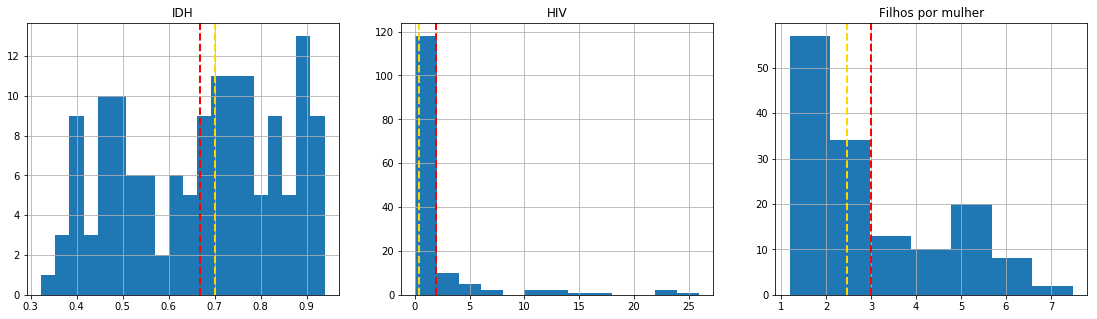

Média: 0.66                                  Média: 1.93                                  Média: 2.99                               
Mediana: 0.70                                Mediana: 0.4                                Mediana: 2.47                               


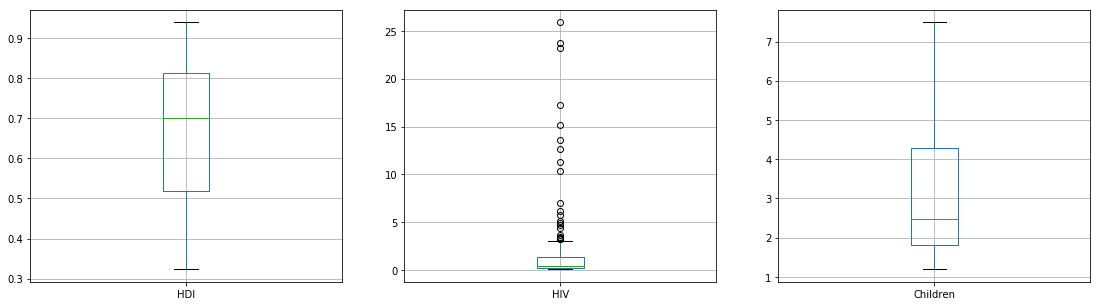

Máximo: 0.93                                  Máximo: 25.9                                  Máximo: 7.49                                
Mínimo: 0.32                                  Mínimo: 0.06                                  Mínimo: 1.19                                


,HDI,HIV,Children
25%,0.51975,0.200,1.8075
50%,0.70050,0.400,2.4750
75%,0.81150,1.325,4.2950


In [7]:
fig=plt.figure(figsize=(19,5))
# plt.tight_layout()
labels=[["IDH",20],["HIV",13],["Filhos por mulher",7]]
medias=[]
medianas=[]
for i in range(3):
    plt.subplot(1,3,i+1)
    df[df.columns[i]].hist(bins=labels[i][1])
    plt.title(labels[i][0])
    media=df[df.columns[i]].mean()
    mediana=df[df.columns[i]].median()
    medias.append(media)
    medianas.append(mediana)
    plt.axvline(media, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(mediana, color='gold', linestyle='dashed', linewidth=2)
plt.show()
s1="Média: "
s2="Mediana: "
for i,j in zip(medias,medianas):
    s1+=str(i)[:4]
    s1+="                                  Média: "
    s2+=str(j)[:4]
    s2+="                                Mediana: "

print(s1[:-10])
print(s2[:-10])

fig=plt.figure(figsize=(19,5))
maximos=[]
minimos=[]
for i in range(3):
    plt.subplot(1,3,i+1)
    maximos.append(max(df[df.columns[i]]))
    minimos.append(min(df[df.columns[i]]))
    
    df[[df.columns[i]]].boxplot()
plt.show()

s1="Máximo: "
s2="Mínimo: "
for i,j in zip(maximos,minimos):
    s1+=str(i)[:4]
    s1+="                                  Máximo: "
    s2+=str(j)[:4]
    s2+="                                  Mínimo: "

print(s1[:-10])
print(s2[:-10])
df.describe().loc[["25%","50%","75%"],["HDI","HIV","Children"]]

# Histograma / Box Plot 1: IDH
Os dados de IDH variam, na teoria, entre 0 e 1. Nesse histograma é possível ver que os dados estão distribuidos entre aproximadamente 0.3 e 0.9. Apesar da distribuição não ser normal, a média e mediana estão quase iguais, já que a diferença entre o segundo e o terceiro quartil é baixa. 

# Histograma / Box Plot 2: HIV
Esse histograma mostra que a maior parte dos países tem índices de HIV muito menores que 5%. O interquartil está entre 0.2 e 1.325, o que significa que maioria dos dados estão nessa faixa. Isso resulta na média e na mediana terem valores muito baixos e muito próximos.

# Histograma / Box Plot 3: Filhos por mulher
Pode-se oberservar que o gráfico é, em sua maioria, decrescente. A atual tendência global de reduzir a quantidade de filhos é perceptivel nesse histograma, que evidencia que a maioria das mulheres preferem ter menos filhos. A média está perto de 3 filhos, porém, a mediana é menor, pois o segundo quartil é muito menor que o terceiro. Mulheres com muitos filhos aumentam a média, no entanto, a mediana mostra que a maioria das mulheres tem menos filhos.

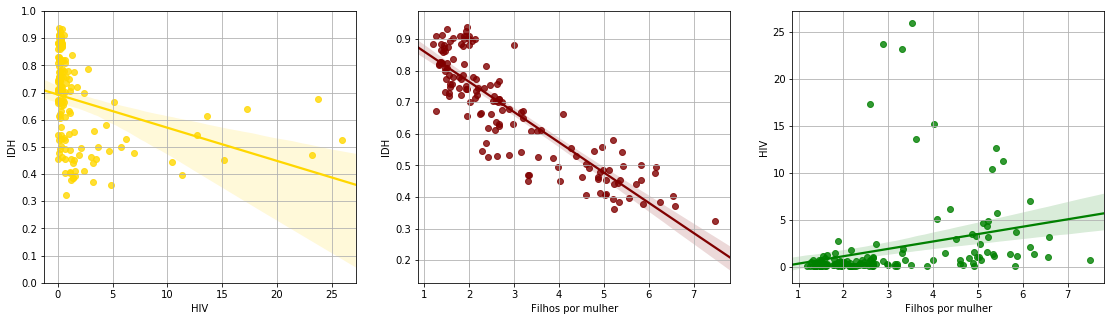

    HIV X IDH - R = -0.31397                 Children X IDH - R = -0.87465                 Children X HIV - R = 0.27919


In [8]:
fig=plt.figure(figsize=(19,5))
plt.subplot(131)

sns.regplot(df["HIV"],df["HDI"],color=("gold"))
plt.xlabel("HIV");plt.ylabel("IDH")
plt.yticks(np.arange(0,1.1,.1))
plt.grid()

plt.subplot(132)
sns.regplot(df["Children"],df["HDI"],color=("maroon"))
plt.xlabel("Filhos por mulher");plt.ylabel("IDH")
plt.grid()

plt.subplot(133)
sns.regplot(df["Children"],df["HIV"],color=("green"))
plt.xlabel("Filhos por mulher");plt.ylabel("HIV")
plt.grid()

plt.show()

a="HIV X IDH - R = {}".format(round(df.corr()["HIV"]["HDI"],5))
b="Children X IDH - R = {}".format(round(df.corr()["Children"]["HDI"],5))
c="Children X HIV - R = {}".format(round(df.corr()["Children"]["HIV"],5))
print("    "+a+"                 "+b+"                 "+c)
# df.corr()

# Análise dos gráficos - variável X variável

## Gráfico 1 - HIV X IDH

O gráfico apresenta uma correlação extremamente baixa de apenas 0.31. Isso mostra que o HIV não tem relação direta com o IDH, já que, em sua maioria, países com IDH alto e países com IDH baixo tem um índice de HIV muito baixo.

## Gráfico 2 - Filhos por mulher X IDH

Nesse gráfico é vísivel a relação entre filhos por mulher e o IDH. A correlação é alta e chega quase a 0.9. Na medida em que o IDH aumenta a quantidade de filhos diminui.

## Gráfico 3 - Filhos por mulher X HIV
Esse é o gráfico que apresenta a menor correlação. A quantidade de filhos por mulher não afeta o índice de HIV. 

# Análise temporal
## Anos: 1990 - 2010

In [9]:
HIVHDI=[]
CHDI=[]
CHIV=[]
years=range(1990,2011)

plot_years=False # Mudar para True para ver todos os gráficos

for year in years:
    idh_temp=hdi_all.loc[ :,["geo", year]].dropna()
    idh_temp.rename(columns={year:"HDI","geo":"Country"},inplace=True)
    idh_temp.set_index("Country",inplace=True)


    hiv_temp=hiv_all.loc[ :,["geo", year]].dropna()
    hiv_temp.rename(columns={2010:"HIV","geo":"Country"},inplace=True)
    hiv_temp.set_index("Country",inplace=True)

    child_temp=child_all.loc[ :,["geo", year]].dropna()
    child_temp.rename(columns={year:"Children","geo":"Country"},inplace=True)
    child_temp.set_index("Country",inplace=True)
    
    dfs_temp=[idh_temp,hiv_temp,child_temp]
    first=dfs_temp.pop(0)

    df_temp=first.join(dfs,how="inner")

    
    HIVHDI.append(df_temp.corr()["HIV"]["HDI"])
    CHDI.append(df_temp.corr()["Children"]["HDI"])
    CHIV.append(df_temp.corr()["Children"]["HIV"])

    if plot_years:
        fig=plt.figure(figsize=(19,5))
        plt.subplot(131)

        sns.regplot(df_temp["HIV"],df_temp["HDI"],color=("gold"))
        plt.xlabel("HIV");plt.ylabel("IDH")
        plt.yticks(np.arange(0,1.1,.1))
        plt.grid()

        plt.subplot(132)
        sns.regplot(df_temp["Children"],df_temp["HDI"],color=("maroon"))
        plt.xlabel("Filhos por mulher");plt.ylabel("IDH")
        plt.grid()

        plt.subplot(133)
        sns.regplot(df_temp["Children"],df_temp["HIV"],color=("green"))
        plt.xlabel("Filhos por mulher");plt.ylabel("HIV")
        plt.grid()

        plt.show()

        a="HIV X IDH - R = {}".format(round(df_temp.corr()["HIV"]["HDI"],5))
        b="Children X IDH - R = {}".format(round(df_temp.corr()["Children"]["HDI"],5))
        c="Children X HIV - R = {}".format(round(df_temp.corr()["Children"]["HIV"],5))
        print("    "+a+"                 "+b+"                 "+c)

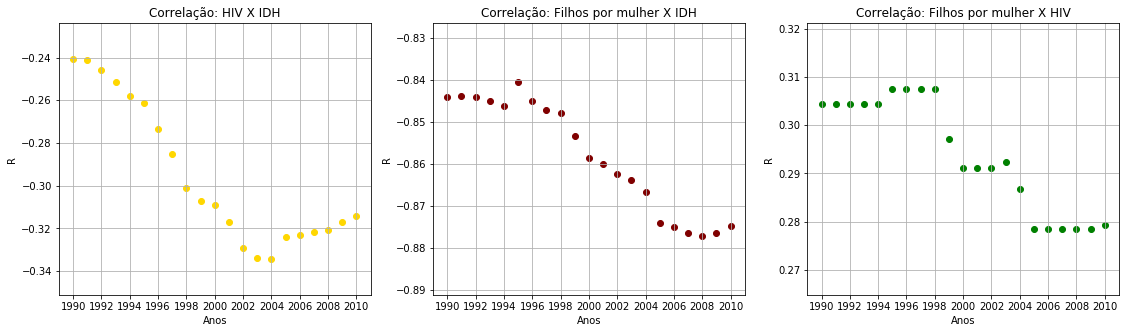

In [10]:
fig=plt.figure(figsize=(19,5))
plt.subplot(131)
plt.scatter(years,HIVHDI,c="gold")
plt.xlabel("Anos")
plt.xticks(range(1990,2011,2))
plt.title("Correlação: HIV X IDH")
plt.ylabel("R")
plt.grid()

plt.subplot(132)
plt.scatter(years,CHDI,c="maroon")
plt.xticks(range(1990,2011,2))
plt.xlabel("Anos")
plt.title("Correlação: Filhos por mulher X IDH")
plt.ylabel("R")
plt.grid()

plt.subplot(133)
plt.scatter(years,CHIV,c="green")
plt.xticks(range(1990,2011,2))
plt.xlabel("Anos")
plt.title("Correlação: Filhos por mulher X HIV")
plt.ylabel("R")
plt.grid()

plt.show()

# Correlação: HIV X IDH
Ao longo dos anos essa correlação aumentou de 0.24 para 0.33. No entanto, esse aumento não significa que o IDH está relacionado ao HDI, já que a correlação permanece extremamente baixa

# Correlação: Filhos por mulher X IDH
A correlação, que já era forte em 1990, aumentou ainda mais ao longo de 20 anos. Esse aumento constata e forte relação desse aspecto com o IDH.

# Correlação: Filhos por mulher X HIV
A correlação entre os dados, que já era baixa, apenas caiu, constatando a falta de relação entre as duas variáveis.

<h1></h1>


### Pergunta inicial: Medidas governamentais para reduzir a quantidade de pessoas com HIV e a quantidade de filhos por mulher melhoram o IDH?
# Conclusão
Medidas governamentais em relação a diminuição do HIV não são eficazes para melhorar o IDH. Isso não quer dizer que todas as medidas para o combate do IDH devem ser abolidas, mas certamente não deveria ser prioridade em um país que mira melhorar esse índice de referência mundial. 

No entanto, medidas governamentais que visam a diminuição de filhos por mulher devem ser priorizadas, já que há uma forte relação entre esse indicador e o IDH. A partir da análise feita é claro que há uma correlação entre esses indicadores, porém, é incerto se há ou não uma relação de causalidade entre a diminuição de filhos de mulher e o aumento do IDH. No entanto, todos os países com IDH alto possuem poucos filhos por mulher, e, portanto, uma medida governamental focada nesse aspecto certamente é necessária.